# Статистический анализ данных сервиса аренды самокатов.


## Ведение.

Данный проект направлен на проведение анализа данных сервиса GoFast, предоставленных о некоторых пользователях из нескольких городов а также об их поездках. Цель проекта - проведение анализа данных и проверка ряда гипотез, которые могут помочь повышению эффективности бизнес-процессов и росту компании.

Для проведения данного исследования компанией были предоставлены три массива данных: о пользователях; о поездках; о стоимости использования сервиса по подписке и без. Указанные массивы содержат информацию об id пользователя, его имени, возрасте, городе, дате совершения каждой поездки, ее продолжительности и расстояние, а также наличие подписки.

В ходе проведения данного исследования планируется:
1. Проведение предобработки данных с целью выявления ошибок, пропусков или дубликатов и их исправления.
2. Исследовательский анализ данных, включающий определение частоты встречаемости городов, соотношение пользователей с подпиской и без, оценка расстояния, которое пользователь преодолевает за одну поездку, продолжительность поездок.
3. Объединение данных (объединение массивов данных в один с ценью проведения более детального анализа) и проведение анализа для каждой категории пользователей отдельно.
4. Подсчет ежемесячной выручки с каждого пользователя.
5. Проверка ряда гипотез.

В заключении проекта будут сформированы основные выводы по резальтатам проведенного исследования, а так же описаны некоторые рекомендации.

## 1. Загрузка данных.

In [73]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from math import factorial, sqrt
from scipy.stats import binom, poisson, norm
import seaborn as sns

In [74]:
try:
    rides = pd.read_csv('/Users/imac27/DataAnalysis/datasets/project4/rides_go.csv')
except:
    rides = pd.read_csv('/datasets/rides_go.csv')
    
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [75]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В данном датафрейме пропуски отсутствуют. Необходимо отметить, что в колонке 'date' тип данных не соответствует требуемому в проекте, что потребует исправления.

In [76]:
try:
    subs = pd.read_csv('/Users/imac27/DataAnalysis/datasets/project4/subscriptions_go.csv')
except:
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [77]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Согласно полученной информации, датафрейм содержит исключительно информацию о тарифах, что составляет две строки, пропусков и наличия некорректных данных не выявлено.

In [78]:
try:
    users = pd.read_csv('/Users/imac27/DataAnalysis/datasets/project4/users_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [79]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Учитывая полученную информацию, в данном датафрейме не содержится пропусков, все данные имеют корректный тип, соответствующй требуемому.

**Промежуточный вывод:**
Все необходимые данные были загружены, выявлены некоторые ошибки в данных, такие как несоответствие типа данных, которые будут устранены в следующем разделе проекта. Так же на следующем этапе будет проведена проверка данных на наличие дубликатов.

## 2. Предобработка данных.

Рассмотрим более подробно каждый массив данных.

`rides` - информация о поездках.

Согласно информации, полученной ранее, пропущенных значений в данном массиве нет, но тип данных в колонке 'date' не соответствует необходимому для дат. Приведем эту часть датафрейма к требуемому формату.

In [80]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Проверим данный датафрейм на наличие явных дубликатов.

In [81]:
rides.duplicated().sum()

0

Дубликаты отсутствуют.

Проверим колонку 'date', какой период времени включен в данные, чтобы в дальнейшем избежать их задвоения.

In [82]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

In [83]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

Данные приведены с января по декабрь 2021 года, соответственно к обращению к месяцу по его номеру нет вероятности получить некорректные задвоения при группировке по месяцам.

В соответствии с заданием к проекту, добавим к данному набору данных новый столбец с номером месяца на основе столбца 'date'.

In [84]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8



Рассмотрим следующий набор данных.

`users` - информация о пользователях.

Согласно информации о данных, полученной ранее, пропущенных значений нет, тип данных соответствует заявленным во всех колонках.

Проверим данный датафрейм на наличие явных дубликатов.

In [85]:
users.duplicated().sum()

31

Удалим выявленные явные дубликаты, а также восстановим порядок индексов после удаления.

In [86]:
users = users.drop_duplicates().reset_index(drop=True)

Проверим колонку 'city' в данном наборе данных на возможное наличие неявных дубликатов.

In [87]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Скрытых дубликатов нет. 

**Промежуточный вывод.**
Вся необходимая предобработка данных была выполнена для всех трех наборов данных, а именно: удалены имеющиеся явные дубликаты и и выполнено приведение к требуемому типу данных, где это было необходимо.

## 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

**1. Частота встречаемости городов.**

In [88]:
users_city = users['city'].value_counts()

users_city = users_city.reset_index()

users_city

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


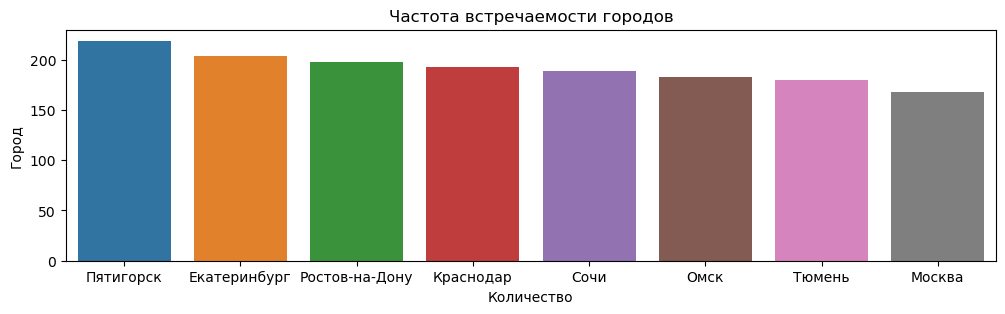

In [138]:
plt.figure(figsize=(12, 3))
diagram = sns.barplot(x='city', y='count', data=users_city)

diagram.set_title('Частота встречаемости городов')
diagram.set_xlabel('Количество')
diagram.set_ylabel('Город')
plt.show()

Согласно данному расчету, наиболее встречающийся город - Пятигорск, в то время, как наименее встречающийся - Москва. Не учитывая Екатеринбурга, все наиболее часто встречающиеся города - южные, что может быть объяснено более теплым климатом, позволяющим использовать самокаты чаще.

**2. Соотношение пользователей с подпиской и без подписки.**

Text(0.5, 1.0, 'Соотношение пользователей с подпиской и без:\n free - без подписки\n ultra - с подпиской\n')

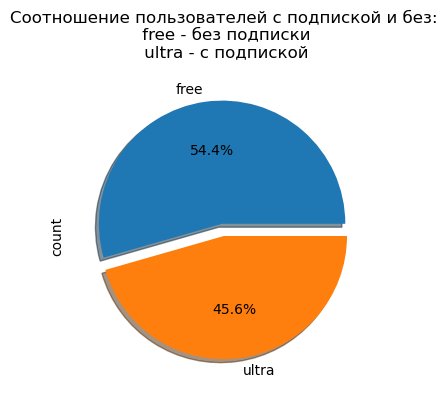

In [90]:
for_pie = users['subscription_type'].value_counts()

for_pie.plot(kind='pie', figsize=(4,4), autopct='%1.1f%%', explode=(0.1, 0), shadow=True)

plt.title('Соотношение пользователей с подпиской и без:\n free - без подписки\n ultra - с подпиской\n')

In [91]:
print ('Процент пользователей, имеющих подписку: {:.2%}'.
 format(len(users.query('subscription_type == "ultra"'))/len(users['subscription_type'])))

print ('Процент пользователей без подписки: {:.2%}'.
 format(len(users.query('subscription_type == "free"'))/len(users['subscription_type'])))

Процент пользователей, имеющих подписку: 45.57%
Процент пользователей без подписки: 54.43%


Процент пользователей без подписки больше имеющих подписку на 8,86%, соответственно сервис более популярен в использовании без подписки.

**3. Возраст пользователей.**

Text(0, 0.5, 'Количество пользователей')

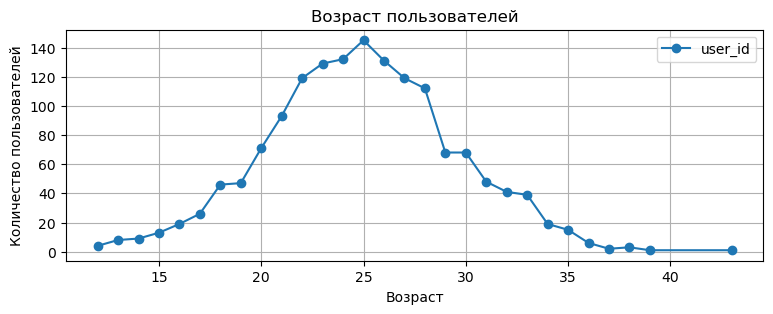

In [92]:
(users.
 pivot_table(index='age', values='user_id', aggfunc='count').
 plot(style='o-', grid=True, figsize=(9,3), title='Возраст пользователей')
) 

plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

По графику, анализирующему возраст пользователей, можно сделать вывод, что использование сервиса начинается с 12 лет, его популярность растет пропорционально возрасту пользователей и достигает максимальной популярности для пользователей 25 лет, после чего наблюдается спад. Необходимо отметить, что практически не встречаются потребители старше 37 лет.

**4. Расстояние, которое пользователь преодолел за одну поездку.**

Text(0, 0.5, 'Количество поездок')

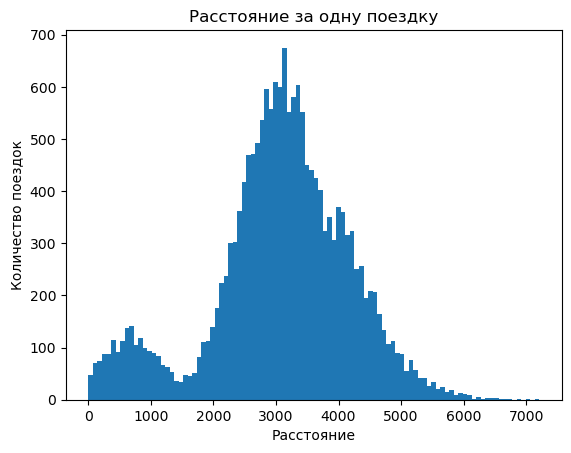

In [93]:
plt.hist(rides['distance'], bins=100)

plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

In [94]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

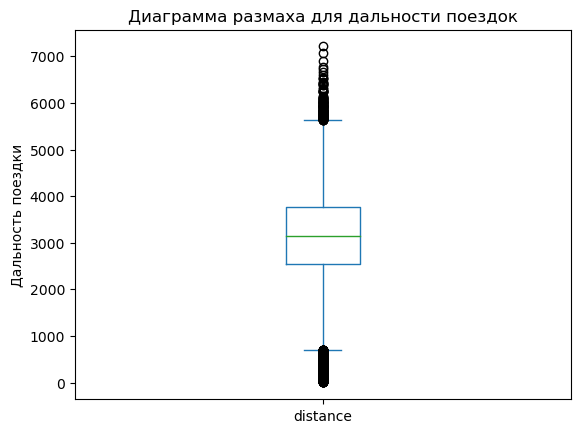

In [95]:
rides['distance'].plot.box()

plt.title('Диаграмма размаха для дальности поездок')
plt.ylabel('Дальность поездки')

plt.show()

Рассмотрев медианное расстояние за одну поездку для каждого пользователя сервиса, можно сделать вывод, что медианное значение расстояния за одну поездку по всей выборке составляет 3131 метров, согласно диаграмме размаха, наиболее частыми поездками являются попадающие в межквартильный размах от 2916 метров до 3338 метров, большинство поездок укладывается от 2300 метров до 3900 метров, но так же имеются выбросы больше 3900 метров и меньше 2300 метров.

**5. Продолжительность поездок.**

Text(0, 0.5, 'Количество поездок')

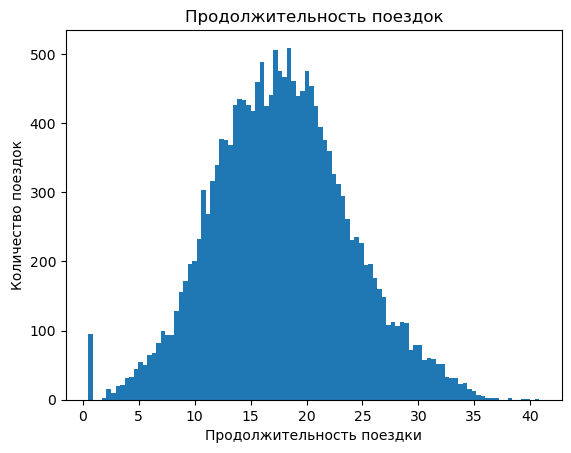

In [96]:
plt.hist(rides['duration'], bins=100)

plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')

In [97]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

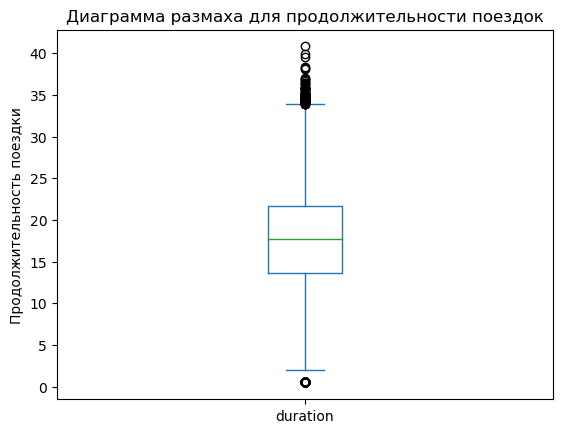

In [98]:
rides['duration'].plot.box()

plt.title('Диаграмма размаха для продолжительности поездок')
plt.ylabel('Продолжительность поездки')

plt.show()

Рассмотрев медианную продолжительность поездки для каждого пользователя сервиса, можно сделать вывод, что медианное значение этого показателя по всей выборке составляет 17,74 минуты, согласно диаграмме размаха, наиболее частыми поездками являются попадающие в межквартильный размах от 16,19 минут до 19,21 минут, большинство поездок укладывается от 12 минут до 24 минут, но так же имеются выбросы больше или меньше данных показателей.

## 4. Объединение данных.

Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [99]:
users_plus_rides = users.merge(rides, on='user_id', how='outer')

data = users_plus_rides.merge(subs, on='subscription_type', how='outer')

data.tail()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,8,50,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Проверим сохранение всех строк с исходными массивами.

In [101]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [102]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.1+ KB


Количество строк осталось максимальным и соответствующим с массивом 'rides', что подтверждает корректность объединения.

Разделим весь массив данных на две части: 
1. data_ultra - содержит данные о пользователях с подпиской. 
2. data_free - содержит данные о пользователях без подписки.

In [103]:
data_ultra = data.query('subscription_type == "ultra"')

In [104]:
data_free = data.query('subscription_type == "free"')

Проанализируем информацию о расстоянии и времени поездок для каждой категории.

**Пользователи с подпиской.**

Text(0, 0.5, 'Количество поездок')

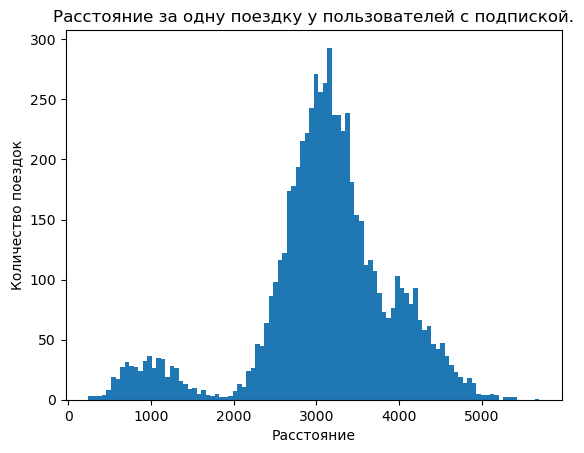

In [105]:
plt.hist(data_ultra['distance'], bins=100)

plt.title('Расстояние за одну поездку у пользователей с подпиской.')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

In [106]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Text(0, 0.5, 'Количество поездок')

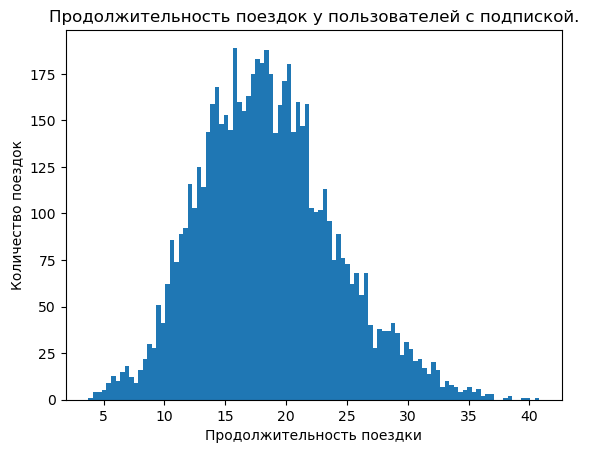

In [107]:
plt.hist(data_ultra['duration'], bins=100)

plt.title('Продолжительность поездок у пользователей с подпиской.')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')

In [108]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

В соответствии с полученными рассчетами, медианное значение поездок у пользователей с подпиской составляет 3142 метров (наиболее частые поездки от 3005 метров до 3287 метров). Медианная продолжительность таких поездок составляет 18,2 минуты (наиболее частые поездки укладываются от 16,7 минут до 19,7 минут).

**Пользователи без подписки.**

Text(0, 0.5, 'Количество поездок')

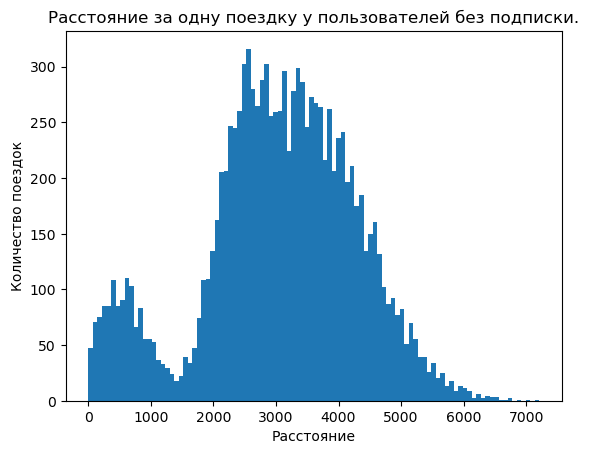

In [109]:
plt.hist(data_free['distance'], bins=100)

plt.title('Расстояние за одну поездку у пользователей без подписки.')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

In [110]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Количество поездок')

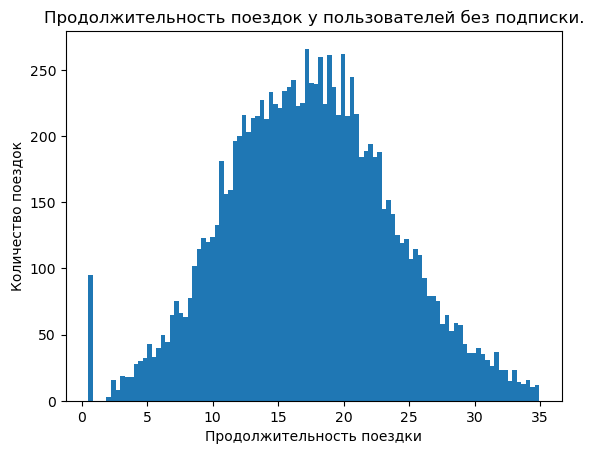

In [111]:
plt.hist(data_free['duration'], bins=100)

plt.title('Продолжительность поездок у пользователей без подписки.')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')

In [112]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

В соответствии с полученными рассчетами, медианное значение поездок у пользователей без подписки составляет 3112 метров (наиболее частые поездки от 2839 метров до 3398 метров). Медианная продолжительность таких поездок составляет 17,3 минуты (наиболее частые поездки укладываются от 15,7 минут до 18,7 минут).

Сравним графики продолжительности поездок и их дальность для двух групп пользователей.

Text(0, 0.5, 'Количество поездок')

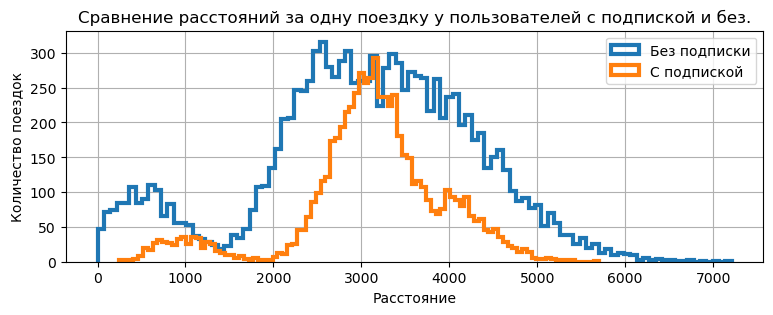

In [113]:
ax = (data_free['distance'].
      plot(kind='hist', bins=100, grid=True, figsize=(9,3), linewidth=3, histtype='step', label='Без подписки', title='Сравнение расстояний за одну поездку у пользователей с подпиской и без.')
     )

(data_ultra['distance'].
 plot(ax=ax, kind='hist', bins=100, grid=True, figsize=(9,3), linewidth=3, histtype='step', label='С подпиской')
)

ax.legend(loc='best')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

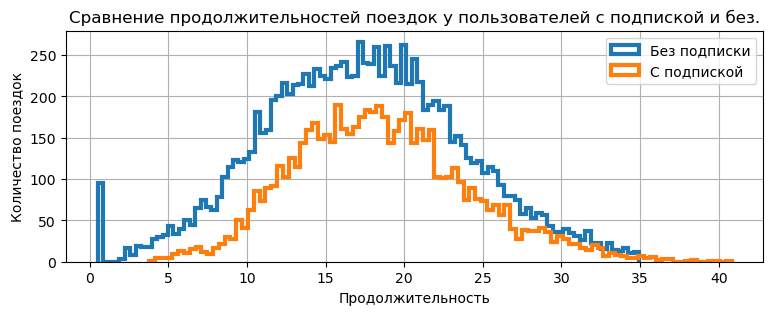

In [114]:
ax = (data_free['duration'].
      plot(kind='hist', bins=100, grid=True, figsize=(9,3), linewidth=3, histtype='step', title='Сравнение продолжительностей поездок у пользователей с подпиской и без.', label='Без подписки')
     )

(data_ultra['duration'].
 plot(ax=ax, kind='hist', bins=100, grid=True, figsize=(9,3), linewidth=3, histtype='step', label='С подпиской')
)

plt.xlabel('Продолжительность')
plt.ylabel('Количество поездок')
plt.legend()

**<font color='green'>Промежуточный вывод.</font>**

Медианное расстояние для каждой группы пользователей примерно равно, но стои отметить, что разброс данных в группе пользователей без подписки больше, т.е. пользователи с подпиской имеют тенденцию совершать примерно одинаковые поездки, возможно они и преобретают подписку для регулярных одинаковых передвижений, в то время как пользователи без подписки действуют более спонтанно. 
Так же стоит отметить, что пользователи без подписки стараются экономить на времени, в связи с чем время их поездок обычно короче на одну минуту, а именно: большинство поездок по подписке происходят в пределах от 16,7 минут до 19,7 минут (медиана 18,2 минуты), а без подписки - от 15,7 минут до 18,7 минут (медиана 17,3 минуты). 

Данный вывод подтверждается графиками, на которых наглядно видно, что время, затрачиваемое на поездку больше у пользователей с подпиской. Также стоит отметить, что график распределения поездок у пользователей с подпиской уже, что говорит о меньшем различии в длительности поездок.

## 5. Подсчет выручки.

In [115]:
data['number_of_rides'] = 1  # Добавим столбец для подсчета количества поездок

data['duration'] = np.ceil(data['duration']) # Округлим столбец c продолжительностью поездки до целых значений в сторону увеличения

data_revenue = data.pivot_table(index=['user_id', 'month', 'subscription_type'], 
                                values=['distance', 'number_of_rides', 'duration'], 
                                aggfunc='sum').reset_index()

data_revenue

,user_id,month,subscription_type,distance,duration,number_of_rides
0,1,1,ultra,7027.511294,42.0,2
1,1,4,ultra,754.159807,7.0,1
2,1,8,ultra,6723.470560,46.0,2
3,1,10,ultra,5809.911100,32.0,2
4,1,11,ultra,7003.499363,56.0,3
...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,26.0,2
11327,1534,8,free,7622.453034,48.0,2
11328,1534,9,free,4928.173852,23.0,1
11329,1534,11,free,13350.015305,78.0,4


In [116]:
data_revenue = data_revenue.merge(subs, on='subscription_type')

data_revenue

,user_id,month,subscription_type,distance,duration,number_of_rides,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,7027.511294,42.0,2,6,0,199
1,1,4,ultra,754.159807,7.0,1,6,0,199
2,1,8,ultra,6723.470560,46.0,2,6,0,199
3,1,10,ultra,5809.911100,32.0,2,6,0,199
4,1,11,ultra,7003.499363,56.0,3,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,26.0,2,8,50,0
11327,1534,8,free,7622.453034,48.0,2,8,50,0
11328,1534,9,free,4928.173852,23.0,1,8,50,0
11329,1534,11,free,13350.015305,78.0,4,8,50,0


Количество строк после добавления новых столбцов сохранено.

In [117]:
data_revenue['revenue'] = data_revenue['duration'] * data_revenue['minute_price'] + \
                          data_revenue['number_of_rides'] * data_revenue['start_ride_price'] + \
                          data_revenue['subscription_fee']


data_revenue.head()

,user_id,month,subscription_type,distance,duration,number_of_rides,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,7027.511294,42.0,2,6,0,199,451.0
1,1,4,ultra,754.159807,7.0,1,6,0,199,241.0
2,1,8,ultra,6723.470560,46.0,2,6,0,199,475.0
3,1,10,ultra,5809.911100,32.0,2,6,0,199,391.0
4,1,11,ultra,7003.499363,56.0,3,6,0,199,535.0


В ходе выполнения данного раздела проекта был добавлен дополнительный столбец 'revenue' с расчетом помесячной выручки, получаемой компанией с каждого пользователя, проведенный с учетом наличия подписки и других параметров использования сервиса.

## 6. Проверка гипотез. 

**6.1. Сравнение времени, которое тратят пользователи с подпиской и без**

Гипотеза:
- Нулевая - пользователи с подпиской тратят столько же времени на поездку сколько пользователи без подписки. 
- Альтернативная - пользователи с подпиской тратят больше времени

In [118]:
alpha = 0.05

result1 = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отверкнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Проверим данную гипотезу дополнительным рассчетом среднего значание продолжительности поездок каждой из групп:

In [119]:
data_ultra['duration'].mean()

18.54198516280583

In [120]:
data_free['duration'].mean()

17.39090929866399

Согласно проведенной проверке гипотезы, пользователи с подпиской действительно тратят больше времени на поездки и соответственно они "выгоднее" для компании. Данное заключение было так же подтверждени сравнением средних значение продолжительности поездок для каждой из групп.

**6.2. Расстояние одной поездки в 3130 метров**

Гипотезы:
- Нулевая - среднее расстояние одной поездки пользователей с подпиской составляет 3130 метров.
- Альтернативная - среднее расстояние одной поездки пользователей с подпиской больше 3130 метров.

In [121]:
distance = 3130

result2 = st.ttest_1samp(data_ultra['distance'], distance, alternative='greater')

if result2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отверкнуть нулевую гипотезу')

Не получилось отверкнуть нулевую гипотезу


Дополнительно проверим данную гипотезу расчетом среднего значения преодолеваемой дистанции для рассматриваемой группы:

In [122]:
data_ultra['distance'].mean()

3115.4453880370247

Согласно проведенной проверке гипотезы, среднее расстояние, которое проезжают на самокате пользователи с подпиской, меньше 3130 метров, что так же подтверждается расчетом среднего значения, которое составляет 3115 метров(меньше 3130 метров).

**6.3. Помесячная выручка от пользователей.**

Гипотезы:
- Нулевая - средняя помесячная выручка от пользователей с подпиской по месяцам равна средней выручке от пользователей без подписки.
- Альтернативная - средняя помесячная выручка от пользователей с подпиской по месяцам выше средней выручки от пользователей без подписки.

In [123]:
data_revenue_ultra = data_revenue.query('subscription_type == "ultra"')

data_revenue_free = data_revenue.query('subscription_type == "free"')

In [124]:
data_revenue_ultra.head()

,user_id,month,subscription_type,distance,duration,number_of_rides,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,7027.511294,42.0,2,6,0,199,451.0
1,1,4,ultra,754.159807,7.0,1,6,0,199,241.0
2,1,8,ultra,6723.470560,46.0,2,6,0,199,475.0
3,1,10,ultra,5809.911100,32.0,2,6,0,199,391.0
4,1,11,ultra,7003.499363,56.0,3,6,0,199,535.0


In [125]:
data_revenue_free.head()

,user_id,month,subscription_type,distance,duration,number_of_rides,minute_price,start_ride_price,subscription_fee,revenue
4533,700,1,free,2515.690719,15.0,1,8,50,0,170.0
4534,700,2,free,13446.659764,89.0,5,8,50,0,962.0
4535,700,3,free,3798.334905,19.0,1,8,50,0,202.0
4536,700,4,free,2984.551206,16.0,1,8,50,0,178.0
4537,700,6,free,5927.650988,29.0,2,8,50,0,332.0


In [126]:
result3 = st.ttest_ind(data_revenue_ultra['revenue'], data_revenue_free['revenue'], alternative='greater')

if result3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отверкнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Проверим данную гипотезу расчетом среднего значения помесячной выручки для каждой группы:

In [127]:
data_revenue_ultra['revenue'].mean()

362.7921906022502

In [128]:
data_revenue_free['revenue'].mean()

328.6413651073845

Согласно проведенной проверке гипотезы, помесячная выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки. Данное заключение было дополнительно проверено расчетом среднего значения помесячной выручки для каждой группы.






**6.4. Количество обращений в техподдержку до и после обновлений.**

Для проверки данного теста, файл, содержащий данные о количестве пользователей до и после обращений, рассматривался бы с помощью гипотезы о равенстве средних для зависимых (парных) выборок, выполняемый методом st.ttest_rel(). Параметрами данного теста являлись бы наборы данных до и после обновления сервера, одинаковые по размеру, а также с сохраненным порядком объектов, для которого проводились измерения до и после.

После выполнения данного метода была бы опровергнута или не опровергнута гипотеза о равенстве количества обращений до или после, в том числе с учетом их уменьшения.


## 7. Распределения.

**7.1. Проведение акции с раздачей промокодов на один бесплатный месяц подписки.**

Text(0, 0.5, 'Вероятность')

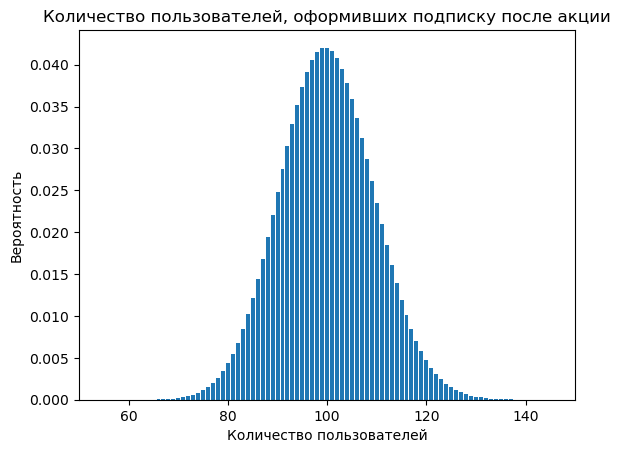

In [129]:
p = 0.1 # Вероятность оформления подписки
n = 1000 # Предположительное количество пользователей акции (редположим, что каждый 10й купит подписку)

marketing = []

for k in range(0, n+1):
    prob = binom.pmf(k, n, p)
    marketing.append(prob)
    
plt.bar(range(0, n+1), marketing)
plt.xlim(50, 150)
plt.title('Количество пользователей, оформивших подписку после акции')
plt.xlabel('Количество пользователей')
plt.ylabel('Вероятность')

Вероятность получения 100 подписок после такой акции составляет более 40%, соответственно выдачи 100 промокодов может быть недостаточно, с 50% вероятностью можно получить количество подписок меньше требуемой величины.

In [130]:
mu = n * p

sigma = sqrt(mu * (1-p))

distr = st.norm(mu, sigma)

x = 100 # Желаемое количество подписок

result = distr.cdf(x)

result

0.5

Метод cdf() подтверждает, что вероятность получить 100 подписок составляет 100% при данном количестве рассылок.

Увеличим предполагаемое количество рассылок до 1168.

Text(0, 0.5, 'Вероятность')

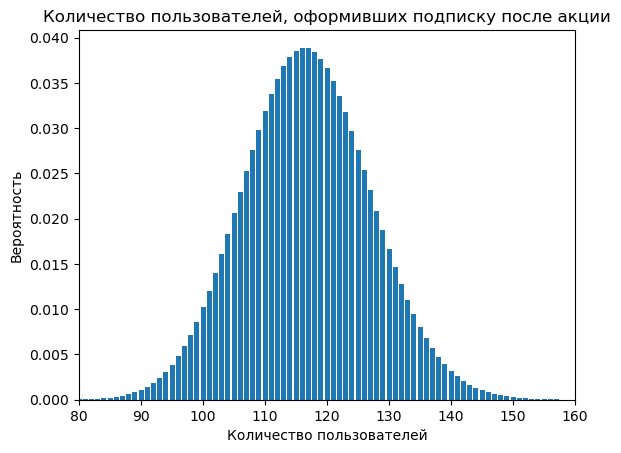

In [131]:
n_new = 1168 # Предположительное количество пользователей акции

marketing_new = []

for k in range(0, n_new+1):
    prob_new = binom.pmf(k, n_new, p)
    marketing_new.append(prob_new)
    
plt.bar(range(0, n_new+1), marketing_new)
plt.xlim(80, 160)
plt.title('Количество пользователей, оформивших подписку после акции')
plt.xlabel('Количество пользователей')
plt.ylabel('Вероятность')

In [132]:
mu_new = n_new * p

sigma_new = sqrt(mu_new * (1-p))

distr = st.norm(mu_new, sigma_new)

result = distr.cdf(x)

result

0.050650790692463

**Вывод:** 

Минимальное количество промокодов, которое длжно быть разослано - 1168 штук. Такое количество позволит получить вероятность не выполнить план равную 5%. 

**7.2. Рассылка push-уведомлений.**

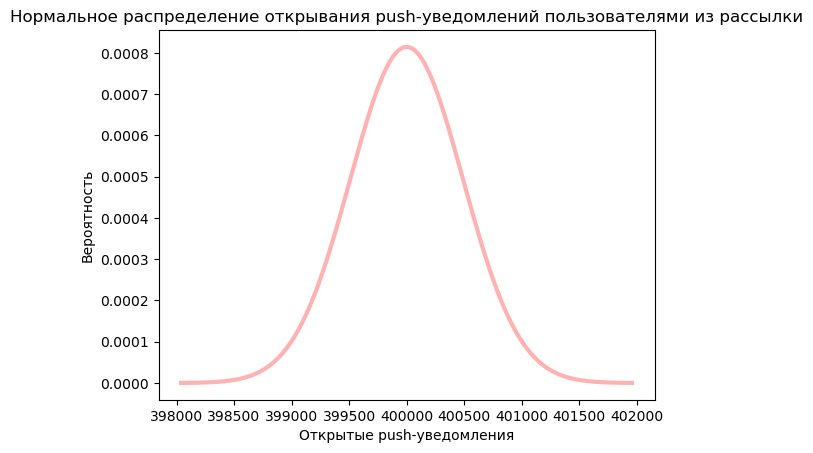

In [133]:
n2 = 1000000
p2 = 0.4

mu2 = n2 * p2
sigma2 = sqrt(n2 * p2 * (1 - p2))

def linspace(start, stop, num):   # Функция для построения графика
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

left = int(mu2 - 4 * sigma2)  # Граница промежутка для аппроксимации
right = int(mu2 + 4 * sigma2)

ay = plt.subplot()

y = linspace(left, right, n2)

ay.plot(y, norm.pdf(y, mu2, sigma2), 'r-', lw=3, alpha=0.3)

plt.title('Нормальное распределение открывания push-уведомлений пользователями из рассылки')
plt.xlabel('Открытые push-уведомления')
plt.ylabel('Вероятность')
plt.show()


In [134]:
distr2 = st.norm(mu2, sigma2)

x2 = 399500

result2 = distr2.cdf(x2)

result2

0.15371708296369768

**Вывод:**

Вероятность того, что уведомления откроют не более 399,5 тыс. пользователей из рассылки, проведенной для 1 млн. клиентов, составляет 15,4%.

# **<font color='green'>ОБЩИЙ ВЫВОД ПО ПРОЕКТУ.</font>**

Данный проект был направлен на проведение анализа данных сервиса GoFast, предоставленных о некоторых пользователях из нескольких городов а также об их поездках.
Для проведения анализа были предоставлены три массива данных:
- о пользователях;
- о поездках;
- о стоимости использования сервиса по подписке и без.

На первом шаге работы была проведена **предобработка данных**, включающая: предварительный анализ основной информации о базе данных (в том числе ее соответствие требуемому типу данных), проверка массивов на наличие пропусков, проверка данных на наличие дубликатов. В ходе данного этапа, все данные были приведены к необходимой форме.

Далее был проведен **исследовательский анализ данных по пяти показателям**. По результатам каждого из них были сделаны соответствующие выводы, а именно:
1. Частота встречаемости городов. Данный сервис используется в 8 городах России. Была выявлена разная активность пользователей в зависимости от населенного пункта, так наиболее часто встречающийся город - Пятигорск, в то время как Москва встречалась в данных реже всего. Кроме того, прослеживается тенденция использования данного сервиса в южной части страны, что может быть объяснено более благоприятными климатическими условиями.

2. Соотношение пользователей с подпиской и без подписки. В ходе исследования было выявлено, что сервис более популярен в использовании без подписки. Процент пользователей без подписки больше имеющих подписку на 8,86%. Возможно, люди не используют самокаты, как постоянный вид транспорта и предпочитают экономить на оплате подписки.

3. Возраст пользователей. Сервис наиболее популярен среди пользователей 25 лет. Для людей младшего и старшего возраста, количество поездок плавно снижается и приближается к нулю для возраста 12 и 37 лет. 

4. Расстояние, которое пользователь преодолел за одну поездку. Среднее расстояние за одно поездку составляет 3131 метров, наиболее частыми поездками являются поездки от 2916 метров до 3338 метров, большинство поездок укладывается от 2300 метров до 3900 метров.

5. Продолжительность поездок. Среднее значение продолжительности поездки составляет 17,74 минуты, наиболее частыми поездками являются поездки от 16,19 минут до 19,21 минут, большинство поездок укладывается от 12 минут до 24 минут.

Для проведения дальнейшего исследования, массивы данных о пользователях и поездках были объединены в один и разделены на двы части по принципу наличия подписки для изучения **характеристик, соответствующих кажной из двух категорий**. Были получены следующие результаты:
- <font color='blue'>Пользователи с подпиской</font>. Медианное значение дальности поездок для этой категории пользователей составляет 3142 метров (наиболее частые поездки от 3005 метров до 3287 метров). Медианная продолжительность таких поездок составляет 18,2 минуты (наиболее частые поездки укладываются от 16,7 минут до 19,7 минут).
- <font color='blue'>Пользователи без подписки</font>. Медианное значение дальности поездок для этой категории составляет 3112 метров (наиболее частые поездки от 2839 метров до 3398 метров). Медианная продолжительность таких поездок составляет 17,3 минуты (наиболее частые поездки укладываются от 15,7 минут до 18,7 минут).

Исходя из вышесказанного можно сделать вывод, что медианное расстояние для каждой группы пользователей примерно равно, но важно отметить, что разброс данных в группе пользователей без подписки больше, т.е. пользователи с подпиской имеют тенденцию совершать примерно одинаковые поездки, возможно они преобретают подписку для регулярных одинаковых передвижений, в то время как пользователи без подписки действуют более спонтанно. Так же стоит отметить, что пользователи без подписки стараются экономить на времени, в связи с чем время их поездок обычно короче на одну минуту.

В завершении проекта была проведена **проверка нескольких гипотез**:
1. Сравнение времени, которое тратят пользователи с подпиской и без. По результатам проведенной проверки данной гипотезы было определено, что пользователи с подпиской действительно тратят больше времени на поездки и соответственно они "выгоднее" для компании.
2. Расстояние одной поездки в 3130 метров. Согласно проведенной проверке гипотезы, среднее расстояние, которое проезжают на самокате пользователи с подпиской, меньше 3130 метров, что способствует более медленному износу оборудования и является дополнительной причиной для стимулирование клиентов на оформление подписок.
3. Помесячная выручка от пользователей. Согласно проведенной проверке гипотезы, помесячная выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки. Соответственно, клиенты с подпиской выгоднее для компании.

**<font color='red'>Рекомендации.</font>**
В заключении проведенного исследования можно отметить некоторые направления для улучшения выручки сервиса GoFast. Поскольку исследование показало, что пользователи с подпиской более выгодные для компании (они тратят больше времени на поездки, а также оплачивают абонентскую плату, что в совокупности гарантирует большую выручку с каждого клиента), стоит рассмотреть некоторые инструменты для их привлечения, такие как предоставление промокодов на месяц бесплатной подписки среди имеющихся клинтов без подписки. Согласно прогнозу, рассылка 1168 промокодов может гарантировать в 95% случаев приобретение 100 новых подписок. 
Также рассылка push-уведомлений в приложений может способствовать распространению информации, поскольку было рассчитано, что с вероятностью около 85% из 1 млн. уведомдений будет открыто около 400 тыс., а сделав их графичаски привлекательными или содержащими интересную информацию для основной группы пользователей (молодых людей в возрасте околого 25 лет), данный инструмент можно использовать для эффективного улучшения показателей компании.
